### Decision Tree algorithm 

belongs to the family of supervised learning algorithms. Unlike other supervised learning algorithms, the decision tree algorithm can be used for solving regression and classification problems too.
The goal of using a Decision Tree is to create a training model that can use to predict the class or value of the target variable by learning simple decision rules inferred from prior data(training data).
In Decision Trees, for predicting a class label for a record we start from the root of the tree. We compare the values of the root attribute with the record’s attribute. On the basis of comparison, we follow the branch corresponding to that value and jump to the next node.


### Types of Decision Trees
 
Types of decision trees are based on the type of target variable we have. It can be of two types:
1.	Categorical Variable Decision Tree: Decision Tree which has a categorical target variable then it called a Categorical variable decision tree.
2.	Continuous Variable Decision Tree: Decision Tree has a continuous target variable then it is called Continuous Variable Decision Tree.
Example:- Let’s say we have a problem to predict whether a customer will pay his renewal premium with an insurance company (yes/ no). Here we know that the income of customers is a significant variable but the insurance company does not have income details for all customers. Now, as we know this is an important variable, then we can build a decision tree to predict customer income based on occupation, product, and various other variables. In this case, we are predicting values for the continuous variables.


### Assumptions while creating Decision Tree
 
Below are some of the assumptions we make while using Decision tree:
•	In the beginning, the whole training set is considered as the root.

•	Feature values are preferred to be categorical. If the values are continuous then they are discretized prior to building the model.

•	Records are distributed recursively on the basis of attribute values.

•	Order to placing attributes as root or internal node of the tree is done by using some statistical approach.
Decision Trees follow Sum of Product (SOP) representation. The Sum of product (SOP) is also known as Disjunctive Normal Form. For a class, every branch from the root of the tree to a leaf node having the same class is conjunction (product) of values, different branches ending in that class form a disjunction (sum).

The primary challenge in the decision tree implementation is to identify which attributes do we need to consider as the root node and each level. Handling this is to know as the attributes selection. We have different attributes selection measures to identify the attribute which can be considered as the root note at each level.


In [1]:
import pandas as pd
import numpy as np

In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [17]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [1]:
from sklearn.tree import DecisionTreeClassifier

# default criterion is gini--> gini impurity
# use entropy if you want to use information gain for the split



In [31]:
emp=pd.read_csv('employees_attrition.csv')
emp.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [55]:
emp.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [160]:
x=emp.drop('Attrition',axis=1)
y=emp['Attrition']
for col in x.columns:
    if x[col].dtype == type(object):
        x[col]= le.fit_transform(x[col])
x.head()


,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,2,1,1,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,1,279,1,8,1,1,1,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,2,1373,1,2,2,4,1,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,1,1392,1,3,4,1,1,5,4,...,3,80,0,8,3,3,8,7,3,0
4,27,2,591,1,2,1,3,1,7,1,...,4,80,1,6,3,3,2,2,2,2


In [125]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

clf = DecisionTreeClassifier(criterion = 'entropy')
clf.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='random')

In [64]:
y_pred = clf.predict(x_test)

In [65]:
print('accuracy:', metrics.accuracy_score(y_test, y_pred)*100)

accuracy: 79.59183673469387


In [66]:
cm = confusion_matrix(y_test, y_pred)
print('confusion matrix is: ', cm, sep='\n')

confusion matrix is: 
[[329  42]
 [ 48  22]]


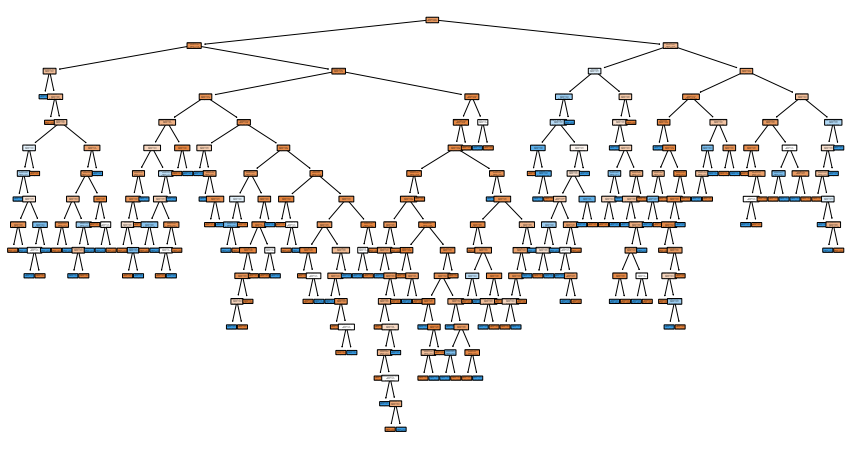

In [67]:
cols = list(x.columns.values)
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))

tree.plot_tree(clf.fit(x,y), feature_names=cols, filled= True, 
              precision=3, proportion=True, rounded= True)

plt.show()

# Pruning

Also called as Hyper parameter tuning

- Pruning helps us to avoid overfitting
    - Generally it is preferred to have a simple model,it avoids overwrittin issue
    - Any additional split that does not add significant value is not worth while.
- We can avoid overfitting by changing the pruning parameter like
    - max_leaf_nodes:
        - indicates the maximum number of leaf nodes a tree can have
        - Allows to reduces the number of leaf nodes and hence pruning the tree
    - min_samples_leaf:
        - Indicates the minimum number of samples required to be at a leaf node. As split point
            at ny depth will only be considered if it leaves min_samples_leaf training
            samples in each of the left and right branches. this may have the effect of smoothing
            the model. The default value is 1.
        - For pruning,restrict the size of sample leaf
        - Minimumn sample size in terminal nodes can be fixed to 30, 100, 300 or 5% of total
    - max_depth:
        - Indicates the maximum depth of the tree. If none, then nodes are expended until all
        leaves are pure or until all leaves contain less than min_samples_split samples.
        - For prunng, reduce the depth of the tree to build a generalized tree
        - set the depth of the tree to 3,5,10 depending after verification on test data.
        
        

In [138]:
from sklearn.tree import DecisionTreeClassifier
'''
Ther parameter splitter indicates the strategy used to choose the split
at eac node. supported startegies are "best" to choose the best split and 
"random" t choose the best random split
'''

clf=DecisionTreeClassifier(criterion ='gini', splitter = 'random',
                         max_leaf_nodes = 10, min_samples_leaf = 5, 
                         max_depth = 6)
clf.fit(x_train,y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='random')

In [139]:
y_pred = clf.predict(x_test)

In [140]:
print('accuracy:', metrics.accuracy_score(y_test, y_pred)*100)

accuracy: 82.53968253968253


In [141]:
cm = confusion_matrix(y_test, y_pred)
print('confusion matrix is: ', cm, sep='\n')

confusion matrix is: 
[[352  19]
 [ 58  12]]


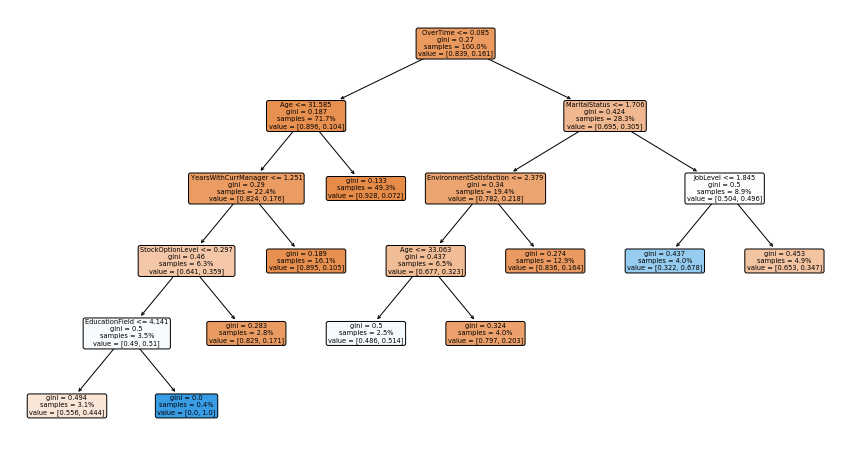

In [142]:
cols = list(x.columns.values)
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))

tree.plot_tree(clf.fit(x,y), feature_names=cols, filled= True, 
              precision=3, proportion=True, rounded= True)

plt.show()

In [143]:
probs = clf.predict_proba(x_test)

In [144]:
prob_positive=probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, prob_positive)
roc_auc = metrics.auc(fpr, tpr)
print('area under the curve:', roc_auc)


area under the curve: 0.7388910281093569


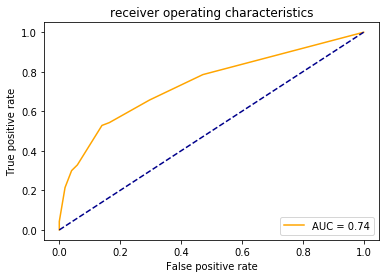

In [145]:
import matplotlib.pyplot as plt
plt.title('receiver operating characteristics')
plt.plot(fpr, tpr, 'orange', label='AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')

plt.plot([0,1],[0,1],color='darkblue', linestyle='--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()